# 커널 서포트 벡터 머신
- perceptron & SVM같은 선형판별함수(Decision hyperplane) 분류모형은 XOR 문제 풀지 못함

### 1. 기저함수: 비선형 판별 모형
- 비선형 $\hat{y} = w^Tx$
- 선형 $\hat{y} = w^T\phi(x)$


- original D차원 독립변수 벡터 $x$ 
- transformed M차원 독립변수 벡터 $\phi(x)$

$$
\phi(\cdot): {R}^D \rightarrow {R}^M \\
\text{vector x} = (x_1, x_2, \cdots, x_D) \rightarrow \phi(\cdot)=(\phi_1(x), \phi_2(x), \cdots, \phi_M(x))  
$$

### 2. 커널 트릭
- 커널$k(x, y) = x^Ty$ 의미: 데이터 간 유사도 측정(similarity)
    - x, y가 동일 벡터일 때 가장 큼
    - 거리 멀수록 작음

#### 1.목적함수

$$
L = \sum_{N}^N a_n - \dfrac{1}{2}\sum_{n=1}^N \sum_{m=1}^N a_n a_m y_n y_m x_n^Tx_m \\
L^{'} = \sum_{N}^N a_n - \dfrac{1}{2}\sum_{n=1}^N \sum_{m=1}^N a_n a_m y_n y_m \phi(x_n^T) \phi(x_m)
$$

#### 2. 예측모형

$$
y = w^Tx - w_0 = \sum_{m=1}^N a_n y_n x_n^Tx - w_0 \\
y^{'} = w^Tx - w_0 = \sum_{m=1}^N a_n y_n \phi(x_n^T) \phi(x) - w_0
$$

#### 3. 정리
$$
k(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

# 3. 커널 예시
- 선형 서포트 벡터 머신

$$
k(x_1, x_2) = x_1^Tx_2
$$

- 다항 커널

$$
k(x_1, x_2) = \{ \gamma(x_1^Tx_2) + \theta) \} ^d
$$

- RBF(Radial Basis Function) = Gaussian Kernel

$$
k(x_1, x_2) = exp(-\gamma || x_i - x_2 || ^2)
$$

- 시그모이드 커널(Sigmoid Kernel)

$$
k(x_1, x_2) = tanh \{\gamma (x_1^T x_2) + \theta \} 
$$

# 4. code `SVM`
- `kernel = "linear"` 선형 SVM
- `kernel = "poly"` 다항 커널
   - `gamma`: $\gamma$
   - `coef`: $\theta$
   - `degree`: $d$
- `kernel = "rbf"(None)`: RBF 커널
    - `gamma`: $\gamma$
- `kernel = "sigmoid"(None)`: 시그모이드 커널
   - `gamma`: $\gamma$
   - `coef`: $\theta$

#### XOR

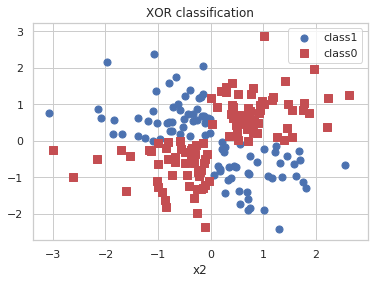

In [19]:
np.random.seed(99)
X_xor = np.random.randn(200, 2)
X1 = X_xor[:, 0] 
X2 = X_xor[:, 1]

# X1, X2을 1&3사분면 / 2&4시분면 으로 분류
Y_xor = np.logical_xor(X1 > 0,  X2 > 0)
Y_xor = np.where(Y_xor, 1, 0)

# scatter plot
plt.scatter(X1[Y_xor == 1], X2[Y_xor == 1], c='b', marker='o', label='class1', s=50)
plt.scatter(X1[Y_xor == 0], X2[Y_xor == 0], c='r', marker='s', label='class0', s=50)
plt.legend()
plt.xlabel("x1")
plt.xlabel("x2")
plt.title("XOR classification")
plt.show()

# Polinomial Kernel

### Fucntion Transform
$$
\text{vector x = } (x_1, x_2) \rightarrow \phi(x) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)
$$

In [40]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [27]:
x1 = X[:, 0]
x2 = X[:, 1]
x1, x2

(array([0, 2, 4]), array([1, 3, 5]))

In [41]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    return np.vstack([x1**2, np.sqrt(2)*x1*x2, x2**2 ]).T

FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ]])

### XOR -> transformation -> $\phi(x)$

$\phi$ 공간에서 직선으로 나누어짐

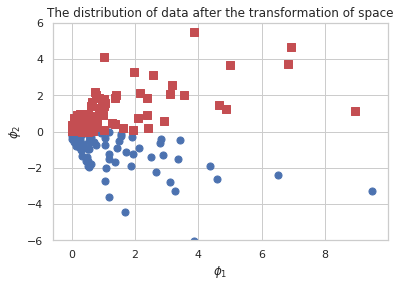

In [71]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)

x1 = X_xor2[:, 0]
x2 = X_xor2[:, 1]
x3 = X_xor2[:, 2]

plt.scatter(x1[Y_xor == 1], x2[Y_xor == 1], c='b', marker='o', s=50)
plt.scatter(x1[Y_xor == 0], x2[Y_xor == 0], c='r', marker='s', s=50)
plt.ylim(-6, 6)
plt.title("The distribution of data after the transformation of space")
plt.xlabel("$\phi_1$")
plt.ylabel("$\phi_2$")
plt.show()

### Solution

In [68]:
def plot_xor(X, y, mod, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                        np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(mod.predict(\
                               np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)    
    plt.scatter(x1[y == 1], x2[ y == 1], c='b', marker='o', label='class1', s=50)
    plt.scatter(x1[y == 0], x2[ y == 0], c='r', marker='s', label='class1', s=50)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

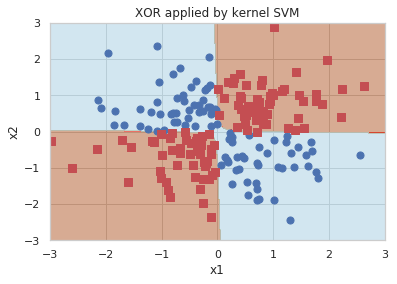

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
basis_mod = Pipeline([("basis", FunctionTransformer(basis)),
                     ("svc", SVC(kernel="linear"))]).fit(X_xor, Y_xor)
plot_xor(X_xor, Y_xor, basis_mod, "XOR applied by kernel SVM")
plt.show()

# RBF

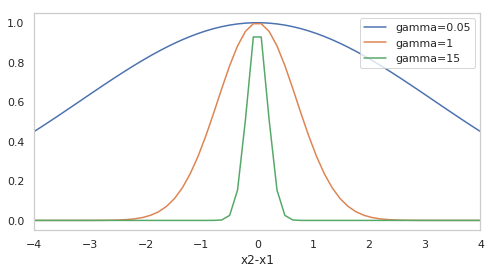

In [88]:
x1 = 0
x2 = np.linspace(-7, 7, 100)
def rbf(x1, x2, gamma):
    return np.exp(-gamma * np.abs(x2 -x1) ** 2)

plt.figure(figsize=(8, 4))
plt.plot(x2, rbf(x1, x2, gamma=0.05), label='gamma=0.05')
plt.plot(x2, rbf(x1, x2, gamma=1), label='gamma=1')
plt.plot(x2, rbf(x1, x2, gamma=15), label='gamma=15')
plt.xlim(-4, 4)
plt.grid(False)
plt.xlabel("x2-x1")
plt.legend()
plt.show()

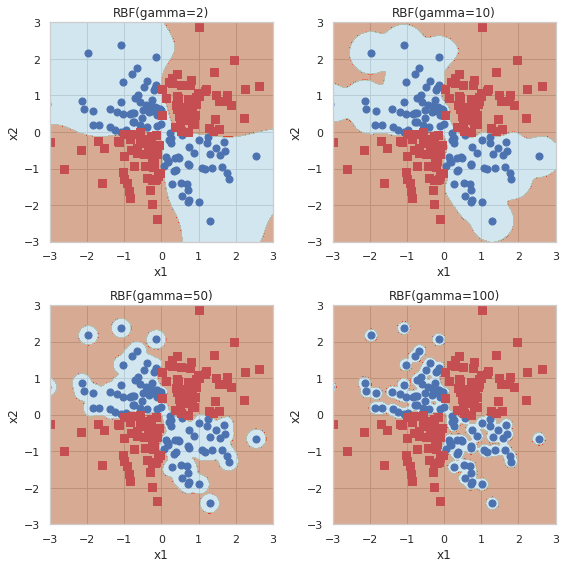

In [94]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_xor(X_xor, Y_xor, SVC(kernel="rbf", gamma=2).fit(X_xor, Y_xor), "RBF(gamma=2)")
plt.subplot(222)
plot_xor(X_xor, Y_xor, SVC(kernel="rbf", gamma=10).fit(X_xor, Y_xor), "RBF(gamma=10)")
plt.subplot(223)
plot_xor(X_xor, Y_xor, SVC(kernel="rbf", gamma=50).fit(X_xor, Y_xor), "RBF(gamma=50)")
plt.subplot(224)
plot_xor(X_xor, Y_xor, SVC(kernel="rbf", gamma=100).fit(X_xor, Y_xor), "RBF(gamma=100)")
plt.tight_layout()
plt.show()

# Solutions

In [95]:
def plot_iris(X, y, mod, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                        np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(mod.predict(\
                               np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)    
    plt.scatter(x1[y == 0], x2[ y == 0], c='r', marker='o', label='class1', s=50)
    plt.scatter(x1[y == 1], x2[ y == 1], c='g', marker='s', label='class2', s=50)
    plt.scatter(x1[y == 2], x2[ y == 2], c='b', marker='^', label='class3', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.title(title)

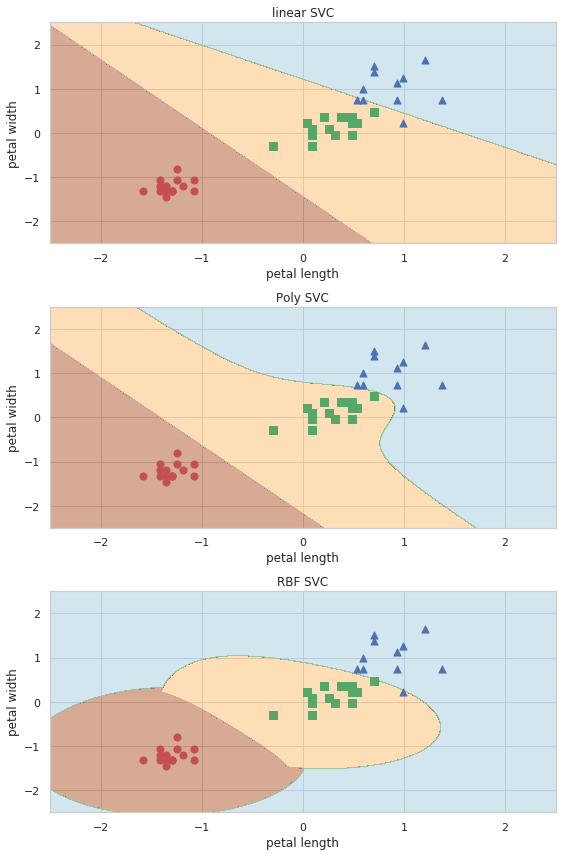

In [96]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

mod1 = SVC(kernel='linear').fit(X_test_std, y_test)
mod2 = SVC(kernel='poly', gamma=10, C=1.0).fit(X_test_std, y_test)
mod3 = SVC(kernel='rbf', gamma=1, C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, mod1, "linear SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, mod2, "Poly SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, mod3, "RBF SVC")

plt.tight_layout()
plt.show()